In [2]:

import re
import pandas as pd
import seaborn as sns


In [3]:
def getScore(score) :
    if score <= 2:
        return 'bad'
    elif score == 3:
        return 'neutral'
    else:
        return 'good'
    
def getFormatedData(path):
    rawdata = pd.read_csv(path)
    rawdata.drop(columns=["review_id", "order_id", "review_creation_date", "review_answer_timestamp"], inplace=True)
    rawdata = rawdata.rename(columns={
        "review_comment_title" : "title", 
        "review_comment_message" : "review", 
        "review_score" : "score"
        })
    rawdata["score"] = rawdata["score"].apply(getScore)
    rawdata["review"].fillna(rawdata['title'])
    rawdata.drop(columns=["title"], inplace=True)
    rawdata.dropna(subset=["review"], inplace=True)

    rawdata["review"].apply(lambda x: re.sub(r'<.*?>', '', x))
    rawdata["review"].apply(lambda x: re.sub(r'<.*?>', '', x))
    return rawdata

In [11]:
data = getFormatedData("data/olist_order_reviews_dataset.csv")

In [17]:
data.head()

,score,review
3,good,Recebi bem antes do prazo estipulado.
4,good,Parabéns lojas lannister adorei comprar pela I...
9,good,aparelho eficiente. no site a marca do aparelh...
12,good,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,good,"Vendedor confiável, produto ok e entrega antes..."


In [25]:
data.iloc[0]["score"] + " | " + data.iloc[0]["review"]

'good | Recebi bem antes do prazo estipulado.'

In [39]:
data[data['score'] == 'bad'].iloc[2]["score"] + " | " + data[data['score'] == 'bad'].iloc[2]["review"]

'bad | Não gostei ! Comprei gato por lebre'

In [41]:
data[data['score'] == 'neutral'].iloc[0]["score"] + " | " + data[data['score'] == 'neutral'].iloc[0]["review"]

'neutral | Eu comprei duas unidades e só recebi uma e agora o que faço?'

<Axes: xlabel='score', ylabel='Count'>

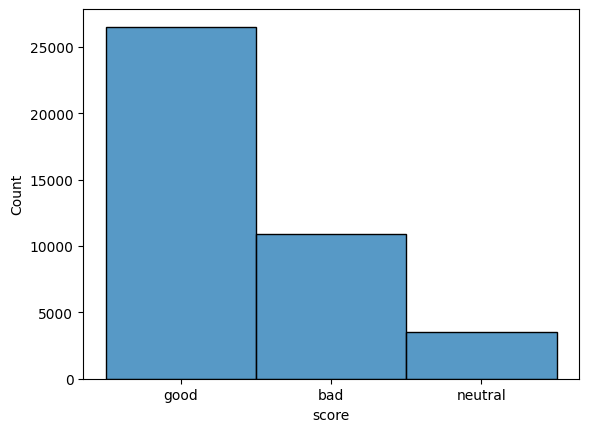

In [13]:
sns.histplot(data["score"])

<Axes: xlabel='count', ylabel='score'>

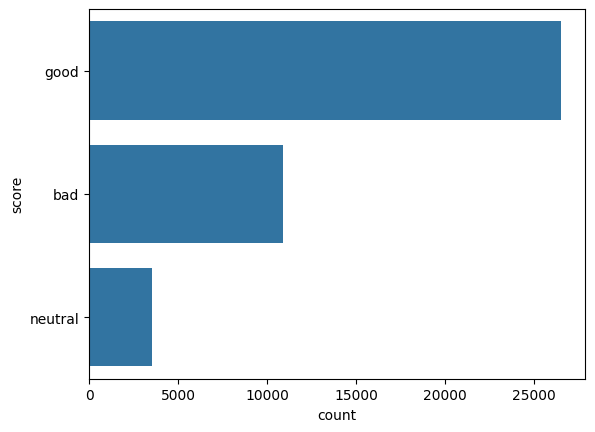

In [6]:
sns.countplot(data["score"])

<Axes: ylabel='score'>

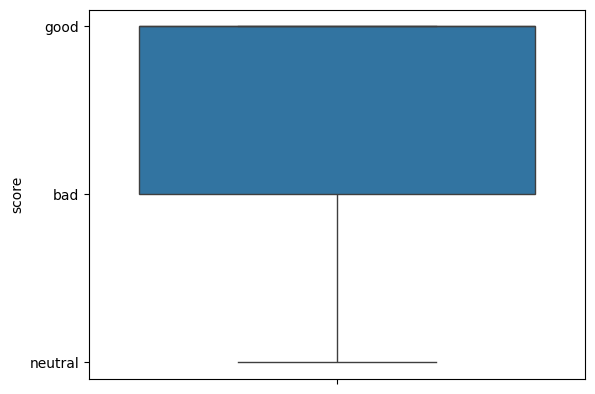

In [8]:
sns.boxplot(data["score"])

In [43]:
# Calcular as porcentagens de cada score em relação ao total por opinião
percentages = data.groupby([ 'score']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

# Plotar um gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='opiniao', y='percentage', hue='score', data=percentages)
plt.title('Distribuição de scores por tipo de opinião')
plt.xlabel('Opinião')
plt.ylabel('Porcentagem')
plt.legend(title='Score')
plt.show()

ValueError: cannot insert score, already exists